In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)


100%|██████████████████████████████████████████████████████████████████████████████| 22.0k/22.0k [00:00<00:00, 150kB/s]

Extracting files...


Path to dataset files: C:\Users\SUBHANUDDIN\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
import joblib
import re
import warnings
warnings.filterwarnings('ignore')

In [85]:
%cd "C:\Users\SUBHANUDDIN\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1"

C:\Users\SUBHANUDDIN\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


In [86]:
%ls

 Volume in drive C is window c
 Volume Serial Number is 50F4-1952

 Directory of C:\Users\SUBHANUDDIN\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1

09/01/2025  10:06 PM    <DIR>          .
09/01/2025  10:06 PM    <DIR>          ..
09/01/2025  10:06 PM            61,194 Titanic-Dataset.csv
               1 File(s)         61,194 bytes
               2 Dir(s)  87,467,839,488 bytes free


In [87]:
titanic = pd.read_csv(r"C:\Users\SUBHANUDDIN\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1\Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
titanic.shape

(891, 12)

In [89]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
titanic.size

10692

In [92]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [93]:
titanic.describe([0,0.05, 0.50, 0.95, 0.99, 1])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
0%,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
5%,45.500000,0.000000,1.000000,4.000000,0.000000,0.000000,7.225000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
95%,846.500000,1.000000,3.000000,56.000000,3.000000,2.000000,112.079150
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220
100%,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
titanic.describe(include=['O']) # only object type data

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [95]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
missing_count= titanic.isna().sum().sort_values(ascending=False)
missing_percentage = (titanic.isna().mean()*100).sort_values(ascending=False)

In [97]:
missing_report= pd.DataFrame({"Null Values":missing_count, "Null Percentage":missing_percentage.round(2)})
display(missing_report)

,Null Values,Null Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [98]:
titanic.drop(columns = ['Cabin'], inplace = True)

In [99]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [100]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [101]:
most_occures=titanic.Embarked.mode()
most_occures

0    S
Name: Embarked, dtype: object

In [102]:
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [103]:
titanic['Embarked'].fillna("S", inplace=True)

In [104]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [105]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [106]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [107]:
titanic["Title"] = titanic["Name"].str.extract(" ([A-Za-z]+)\.") # Extract Title from Name Columns
titanic[["Name", "Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [108]:
titanic['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [109]:
# standarize similer titles into common groups
titanic['Title'] = titanic['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic['Title'] = titanic['Title'].replace(['Mme'], 'Mrs')
titanic['Title'] = titanic['Title'].replace(['Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'Rare')

In [110]:
titanic['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       16
Dr          7
Name: count, dtype: int64

In [111]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [112]:
titanic['Family Size'] = titanic['SibSp'] + titanic['Parch'] +1
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,C,Mr,1
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,28.0,0,0,W./C. 6609,7.5500,S,Miss,1
45,46,0,3,"Rogers, Mr. William John",male,28.0,0,0,S.C./A.4. 23567,8.0500,S,Mr,1
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C,Mr,1
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,S,Mr,3
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,Miss,1
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,S,Mr,1
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,S,Mr,1
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,C,Miss,1
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,C,Mr,3


In [113]:
def Family_size(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Small"
    else:
        return "Large"
    
        

In [114]:
titanic['Family Size'] = titanic['Family Size'].apply(Family_size)
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,S,Master,Small
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,S,Mr,Alone
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,S,Mr,Alone
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,S,Mr,Alone
168,169,0,1,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,S,Mr,Alone
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S,Mr,Small
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,S,Mr,Alone
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,C,Mrs,Small
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,S,Mr,Alone
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,S,Mr,Alone


In [115]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
Family Size     object
dtype: object

In [116]:
titanic["Age"] = titanic["Age"].astype("int64")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
 12  Family Size  891 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 90.6+ KB


In [117]:
def age_cat(number):
    if number <=2:
        return "Baby"
    elif number > 2 and number <= 12:
        return "Child"
    elif number >12 and number <=18:
        return "Teenager"
    elif number > 18 and number <30:
        return "Young"
    elif number>30 and number <50:
        return "Middle-age"
    else:
        return "Old"

titanic["Age_cat"]=titanic["Age"].apply(age_cat)

In [118]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family Size,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr,Small,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs,Small,Middle-age
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss,Alone,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs,Small,Middle-age
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr,Alone,Middle-age


In [119]:
categorical_cols = ["Pclass","Sex","Embarked","Family Size","Title","Age_cat"]

In [120]:
def Categorical_summary(dataframe, col_name):
    print(pd.DataFrame({"people":dataframe[col_name].value_counts(),"Ratio": 100* dataframe[col_name].value_counts()/len(dataframe)}))
    print("_"*100)
for col in categorical_cols:
    Categorical_summary(titanic,col)

        people      Ratio
Pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954
____________________________________________________________________________________________________
        people      Ratio
Sex                      
male       577  64.758698
female     314  35.241302
____________________________________________________________________________________________________
          people      Ratio
Embarked                   
S            646  72.502806
C            168  18.855219
Q             77   8.641975
____________________________________________________________________________________________________
             people      Ratio
Family Size                   
Alone           537  60.269360
Small           292  32.772166
Large            62   6.958474
____________________________________________________________________________________________________
        people      Ratio
Title                    
Mr         517 

In [122]:
numeric_cols= ['Age', 'Fare']
def number_summary(dataframe, col):
    quantile = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]
    print(dataframe[col].describe(quantile).T)
    print("-"*100)
for col in numeric_cols:
    number_summary(titanic, col)
    

count    891.000000
mean      29.345679
std       13.028212
min        0.000000
5%         6.000000
10%       16.000000
20%       20.000000
30%       24.000000
40%       28.000000
50%       28.000000
60%       28.000000
70%       32.000000
80%       38.000000
90%       47.000000
max       80.000000
Name: Age, dtype: float64
----------------------------------------------------------------------------------------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
max      512.329200
Name: Fare, dtype: float64
----------------------------------------------------------------------------------------------------


In [136]:
Target = "Survived"
def Target_summary_with_categorical_cols(dataframe, target, cols):
    print(pd.DataFrame({"Target_mean": dataframe.groupby(cols)[target].mean()}), end="\n\n")
    print("_"*100)
for col in categorical_cols:
    Target_summary_with_categorical_cols(titanic, Target, col)

        Target_mean
Pclass             
1          0.629630
2          0.472826
3          0.242363

____________________________________________________________________________________________________
        Target_mean
Sex                
female     0.742038
male       0.188908

____________________________________________________________________________________________________
          Target_mean
Embarked             
C            0.553571
Q            0.389610
S            0.339009

____________________________________________________________________________________________________
             Target_mean
Family Size             
Alone           0.303538
Large           0.161290
Small           0.578767

____________________________________________________________________________________________________
        Target_mean
Title              
Dr         0.428571
Master     0.575000
Miss       0.702703
Mr         0.156673
Mrs        0.793651
Rare       0.312500

________________

In [138]:
# survived by Pclass
titanic[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [139]:
# survived by sex 
titanic[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by="Survived", ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [144]:
# survived by Family Size
titanic[['Family Size', 'Survived']].groupby('Family Size').mean().sort_values(by="Survived", ascending=False)

,Survived
Family Size,
Small,0.578767
Alone,0.303538
Large,0.161290


In [146]:
titanic[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [147]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [148]:
titanic.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()

Embarked,C,Q,S
Sex,,,
female,0.876712,0.750000,0.692683
male,0.305263,0.073171,0.174603


In [149]:
titanic.groupby(['Sex','Age_cat'])['Survived'].mean()

Sex     Age_cat   
female  Baby          0.600000
        Child         0.590909
        Middle-age    0.787500
        Old           0.852941
        Teenager      0.750000
        Young         0.719697
male    Baby          0.642857
        Child         0.521739
        Middle-age    0.228188
        Old           0.119403
        Teenager      0.088235
        Young         0.148276
Name: Survived, dtype: float64

In [152]:
pd.pivot_table(titanic, values='Survived', index=['Sex', 'Pclass', 'Family Size'], aggfunc='mean')

Survived
Sex    Pclass Family Size          
female 1      Alone        0.970588
              Large        1.000000
              Small        0.964286
       2      Alone        0.906250
              Large        1.000000
              Small        0.928571
       3      Alone        0.616667
              Large        0.111111
              Small        0.561404
male   1      Alone        0.333333
              Large        0.000000
              Small        0.444444
       2      Alone        0.097222
              Small        0.277778
       3      Alone        0.121212
              Large        0.037037
              Small        0.250000

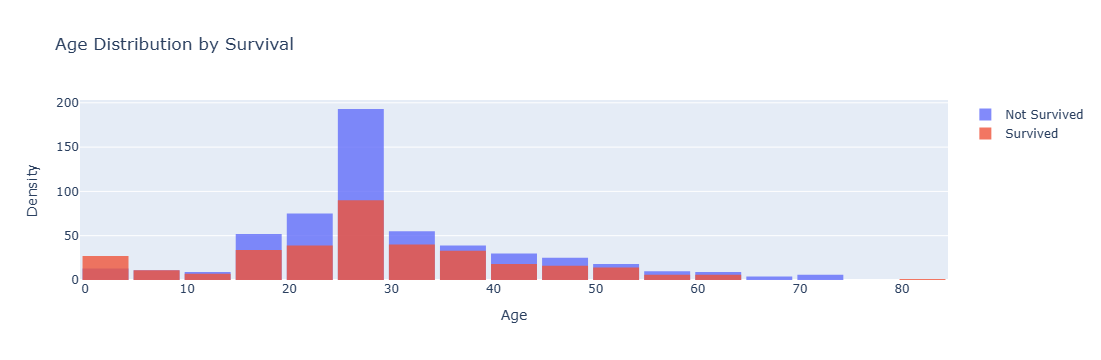

In [157]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==0]['Age'], name='Not Survived', opacity=0.8))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==1]['Age'], name='Survived', opacity=0.8))

fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()

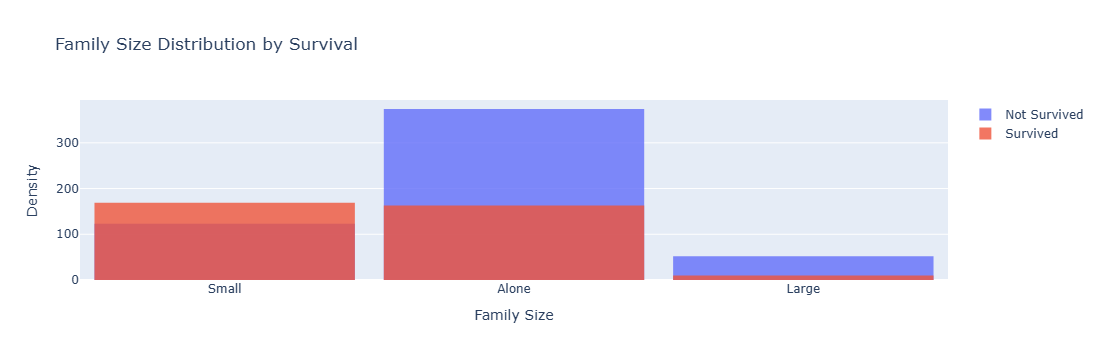

In [161]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==0]['Family Size'], name='Not Survived', opacity=0.8))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==1]['Family Size'], name='Survived', opacity=0.8))

fig.update_layout(
    title='Family Size Distribution by Survival',
    xaxis_title='Family Size',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()

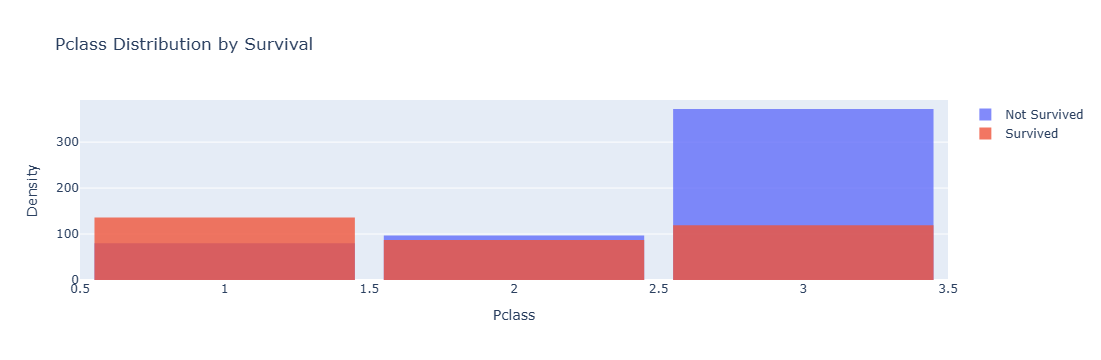

In [163]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==0]['Pclass'], name='Not Survived', opacity=0.8))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived']==1]['Pclass'], name='Survived', opacity=0.8))

fig.update_layout(
    title='Pclass Distribution by Survival',
    xaxis_title='Pclass',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1, 
)

fig.show()

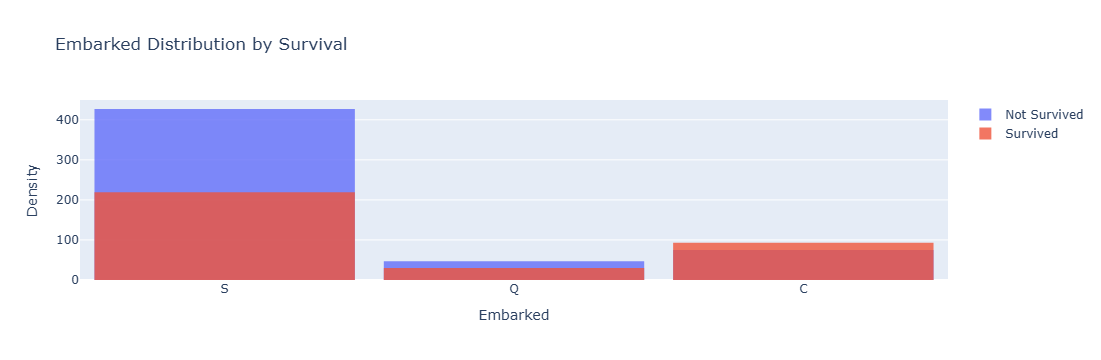

In [165]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=titanic[titanic['Survived'] == 0]['Embarked'], name='Not Survived', opacity=0.8))
fig.add_trace(go.Histogram(x=titanic[titanic['Survived'] == 1]['Embarked'], name='Survived', opacity=0.8))

fig.update_layout(
    title='Embarked Distribution by Survival',
    xaxis_title='Embarked',
    yaxis_title='Density',
    barmode='overlay',  
    bargap=0.1,  
)

fig.show()

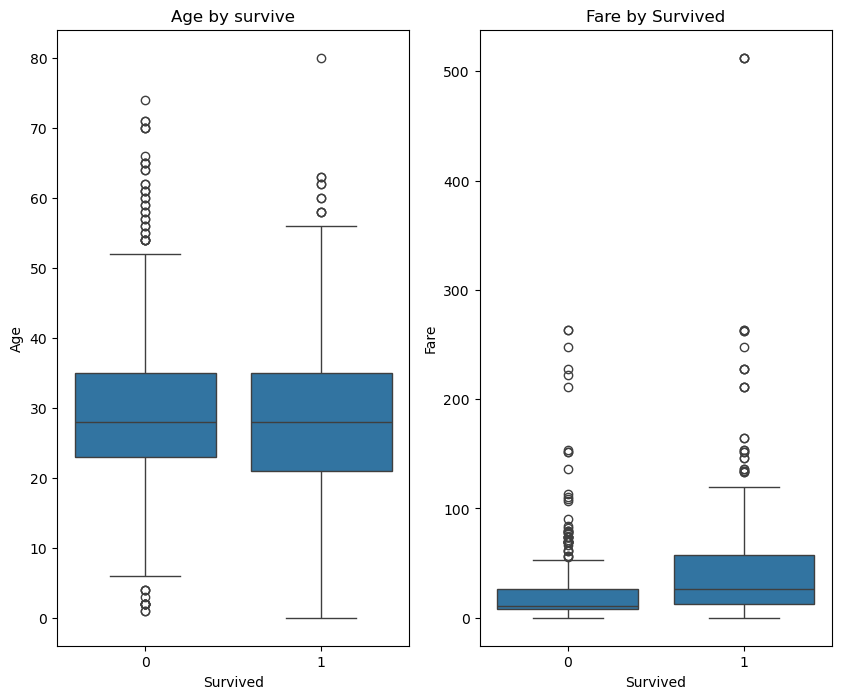

In [168]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(x="Survived",y="Age",data=titanic)
plt.title("Age by survive")
plt.xlabel("Survived")
plt.ylabel("Age")

plt.subplot(1,2,2)
sns.boxplot(x="Survived",y="Fare",data=titanic)
plt.title("Fare by Survived")
plt.xlabel("Survived")
plt.ylabel("Fare")

plt.show()


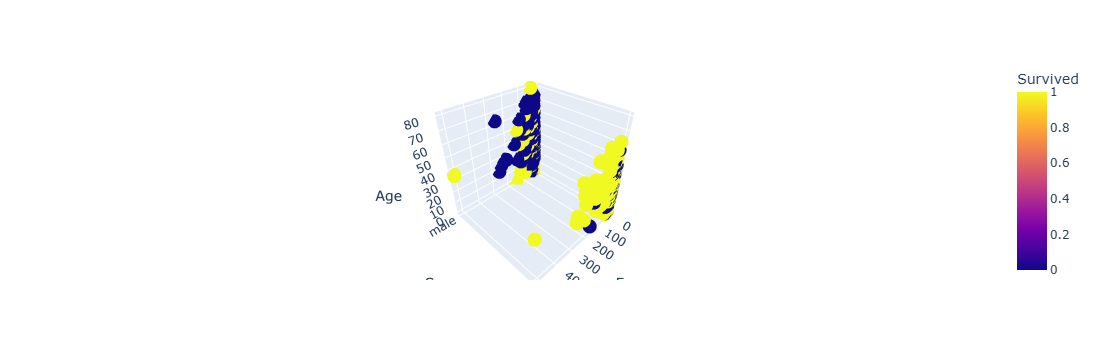

In [170]:
fig = px.scatter_3d(titanic, x='Fare', y='Sex', z='Age',color='Survived')
fig.show()